Obstacle shape: (1024, 1152)
setting initial velocity u


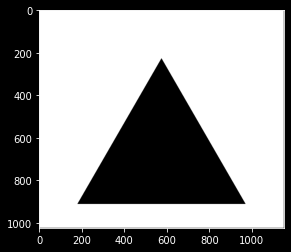

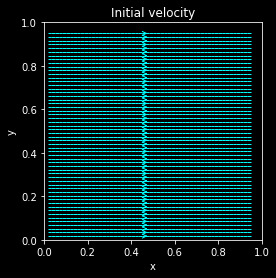

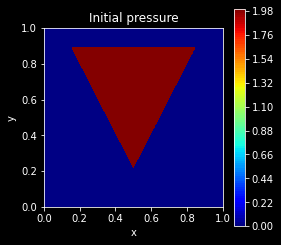

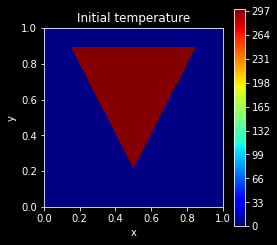

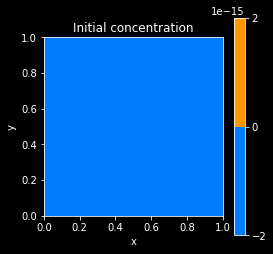

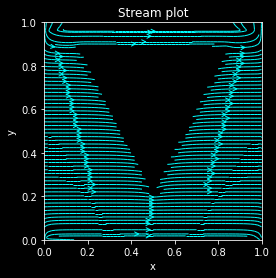

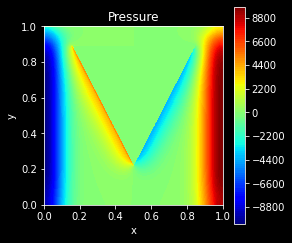

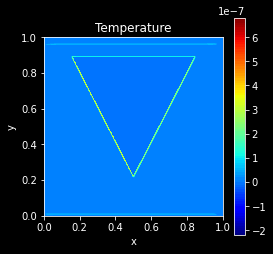

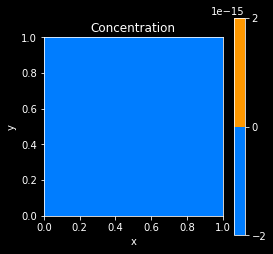

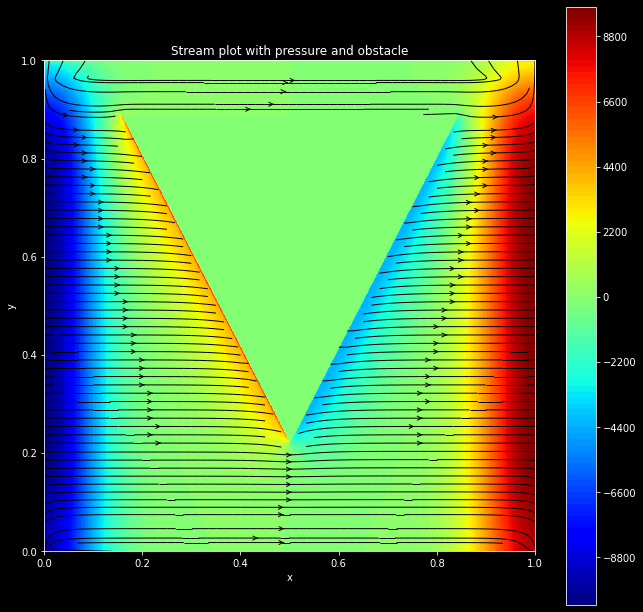

In [4]:
from numba_fluid import Fluid
from numba_simulation import Simulation
from numba_simulation import from_picture
import matplotlib.pyplot as plt
import numpy as np

image_path = r"numba/sample_obstacle.png"
s = from_picture(image_path, 1, 1, 273.15 + 25, 2)
#s = Simulation(1, 1, 30, 30)
grid_size = s.grid_size
print('Obstacle shape:',s.obstacle.shape)

u0 = np.zeros(grid_size)
v0 = np.zeros(grid_size)
u0[10:-40, 10:-40] = 1.0
s.initial_velocity_u = u0
s.initial_velocity_v = v0

# plot obstacle
plt.imshow(s.obstacle, cmap='gray')
# use dark background
plt.style.use('dark_background')


def draw_plot(field, title):
    ny, nx = s.grid_size
    length_y, length_x = s.domain_length

    x = np.linspace(0, length_x, nx)
    y = np.linspace(0, length_y, ny)
    X, Y = np.meshgrid(x, y)

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, length_x)
    ax.set_ylim(0, length_y)
    ax.set_aspect('equal')
    bar = ax.contourf(X, Y, field, 100, cmap='jet')
    fig.colorbar(bar, ax=ax)


def draw_stream_plot(velocity_x, velocity_y, title):
    ny, nx = s.grid_size
    length_y, length_x = s.domain_length

    x = np.linspace(0, length_x, nx)
    y = np.linspace(0, length_y, ny)
    X, Y = np.meshgrid(x, y)

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, length_x)
    ax.set_ylim(0, length_y)
    ax.set_aspect('equal')
    ax.streamplot(X, Y,
                  velocity_x, velocity_y,
                  color='cyan',
                  density=2,
                  linewidth=1, arrowsize=1, arrowstyle='->')


water = Fluid(
    density=997,
    viscosity=8.9e-4,
    specific_heat_capacity=4181,
    thermal_conductivity=0.607,
    diffusivity=1.16e-5 * 1e-3,  # water acetone
)

u0, v0, p0, t0, c0 = s.initial_conditions

# Initial conditions
draw_stream_plot(u0, v0, 'Initial velocity')
draw_plot(p0, 'Initial pressure')
draw_plot(t0, 'Initial temperature')
draw_plot(c0, 'Initial concentration')

# Final conditions
u, v, p, t, c = s.simulate(water, 1e-5, 300)

draw_stream_plot(u, v, 'Stream plot')
draw_plot(p, 'Pressure')
draw_plot(t, 'Temperature') 
draw_plot(c, 'Concentration')

# Streamplot with pressure and obstacle
ny, nx = s.grid_size
length_y, length_x = s.domain_length
x = np.linspace(0, length_x, nx)
y = np.linspace(0, length_y, ny)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(11, 11))
ax.set_title('Stream plot with pressure and obstacle')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, s.domain_length[0])
ax.set_ylim(0, s.domain_length[1])
ax.set_aspect('equal')
ax.streamplot(X, Y,
                u, v, color='black',
                density=2,
                linewidth=1, arrowsize=1, arrowstyle='->')
#ax.contour(X, Y, p, 10, colors='white')
p_cf = ax.contourf(X, Y, p, 100, cmap='jet')
fig.colorbar(p_cf, ax=ax)
ax.imshow(s.obstacle, cmap='gray', alpha=0.7)

